## Task-Description:
1. Implement the "Gradient Descent" shown in the lecture 
Example in numpy
2. Implement a least squares equation for the data shown in the 
least squares method for the data shown in lecture

## Implementation:
Task 1:

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

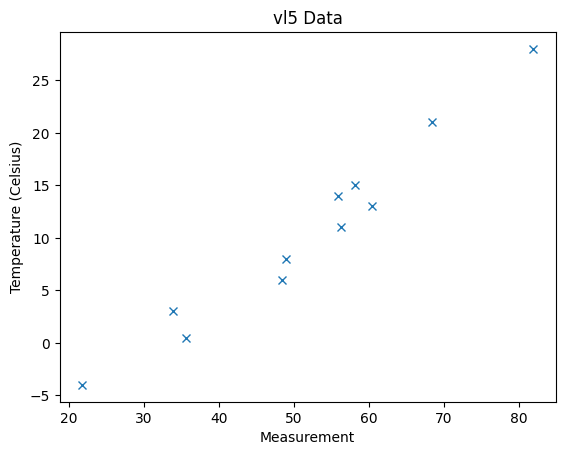

In [3]:
# import data
values = np.loadtxt('vl5_data.csv')
t_u = np.array(values[:,1])
t_c = np.array(values[:,0])
plt.plot(t_u, t_c, 'x')
plt.title("vl5 Data")
plt.xlabel("Measurement");
plt.ylabel("Temperature (Celsius)");

In [4]:
# define functions
def model(t_u, w, b):
    t_p = w*t_u + b
    return t_p

def loss_function(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    loss = sq_diff.mean()
    return loss

def dloss_function(t_p, t_c):
    return 2*(t_p - t_c) / (np.size(t_p))

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_function(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_function(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    grad = np.stack([dloss_dw.sum(), dloss_db.sum()])
    return grad

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    params = [params[0][0], params[1][0]]
    for i in range(n_epochs):
        t_p = model(t_u, params[0], params[1])
        print(f'loss_fn = {loss_function(t_p, t_c)}')
        grad = grad_function(t_u, t_c, t_p, params[0], params[1])
        params = params - learning_rate * grad
    return params


loss_fn = 80.36434545454544
loss_fn = 37.57491443720965
loss_fn = 30.871081493991234
loss_fn = 29.756196009195058
loss_fn = 29.507148000491885
loss_fn = 29.39245416713703
loss_fn = 29.298826583908706
loss_fn = 29.208719127832033
loss_fn = 29.119413503209987
loss_fn = 29.030487848051678
loss_fn = 28.94187595900097
loss_fn = 28.853566717584552
loss_fn = 28.765557539430105
loss_fn = 28.67784716479513
loss_fn = 28.59043454200423
loss_fn = 28.50331865451376
loss_fn = 28.416498494118954
loss_fn = 28.329973056794543
loss_fn = 28.243741342040803
loss_fn = 28.157802352772514
loss_fn = 28.072155095292
loss_fn = 27.986798579275263
loss_fn = 27.901731817760194
loss_fn = 27.816953827135034
loss_fn = 27.732463627127036
loss_fn = 27.64826024079117
loss_fn = 27.564342694498738
loss_fn = 27.48071001792614
loss_fn = 27.39736124404375
loss_fn = 27.314295409104588
loss_fn = 27.23151155263327
loss_fn = 27.149008717414873
loss_fn = 27.066785949483894
loss_fn = 26.98484229811317
loss_fn = 26.90317681580293
l

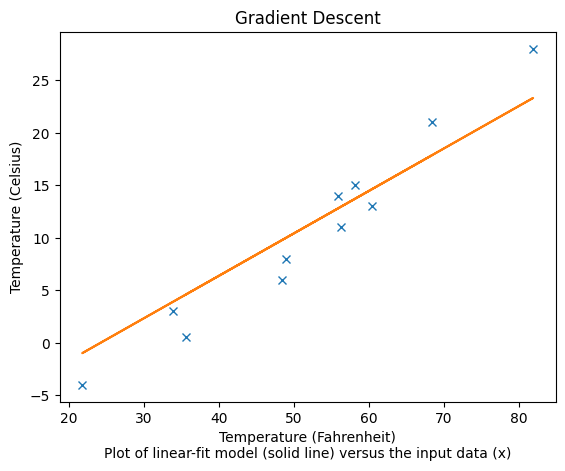

In [5]:
w = np.ones(1)
b = np.zeros(1)
params = np.array([w, b])
n_epochs = 500
learning_rate = 1e-2

t_un = t_u * 0.1 # normieren

param = training_loop(n_epochs, learning_rate, params, t_un, t_c)

t_p = model(t_un, param[0], param[1])
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p)
plt.title("Gradient Descent")
plt.xlabel("Temperature (Fahrenheit)"
           "\nPlot of linear-fit model (solid line) versus the input data (x)");
plt.ylabel("Temperature (Celsius)");
plt.show()


Task 2:

In [7]:
def slope_function(A):
    t_c, t_u = np.vsplit(A.T, 2)
    c_mean = t_c.mean()
    u_mean = t_u.mean()

    product = 0
    u_square = 0
    for i in range(np.size(t_c)):
        c = t_c[0,i] - c_mean
        u = t_u[0,i] - u_mean
        product = product + (c * u)
        u_square = u_square + pow((t_u[0,i] - u_mean), 2)

    slope = product / u_square
    return slope

def y_start_function(A, slope):
    t_c, t_u = np.vsplit(A.T, 2)
    c_mean = t_c.mean()
    u_mean = t_u.mean()
    y_start = c_mean - slope * u_mean
    return y_start

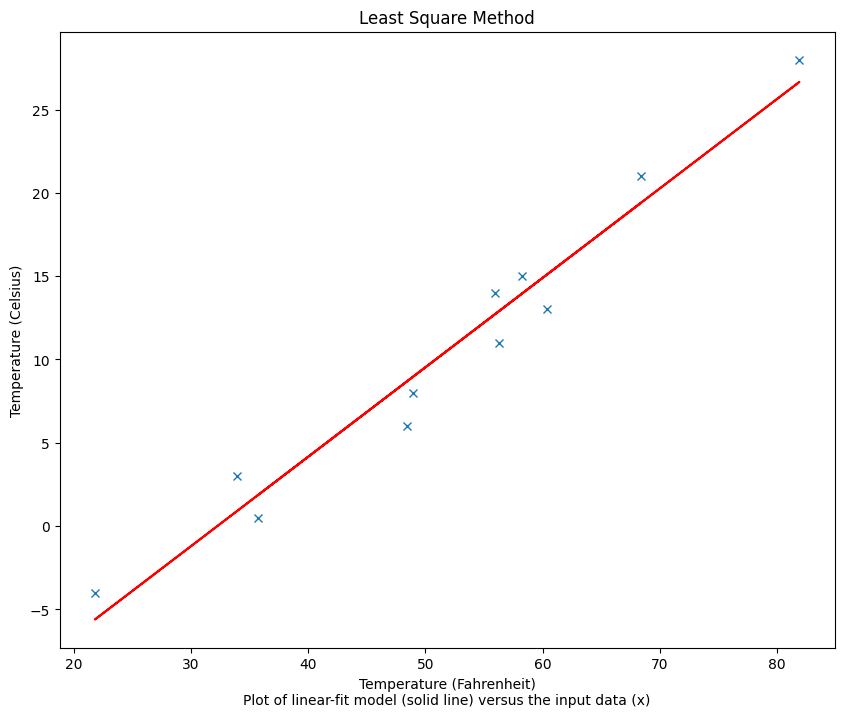

In [8]:
# assemble matrix A from data
A = np.vstack([t_c, t_u]).T
# print(A)
a = slope_function(A)
b = y_start_function(A, a)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, a*t_u + b, 'r')
plt.title("Least Square Method")
plt.xlabel("Temperature (Fahrenheit)"
           "\nPlot of linear-fit model (solid line) versus the input data (x)");
plt.ylabel("Temperature (Celsius)");
plt.show()